Schwabish, J. (2014). An economist’s guide to visualizing data. Washington, DC: Urban Institute. Recuperado de https://surf.econ.uic.edu/wp-content/uploads/sites/882/2023/05/Schwabish-Jonathan.-An-Economists-Guide-to-Visualizing-Data-2014.pdf

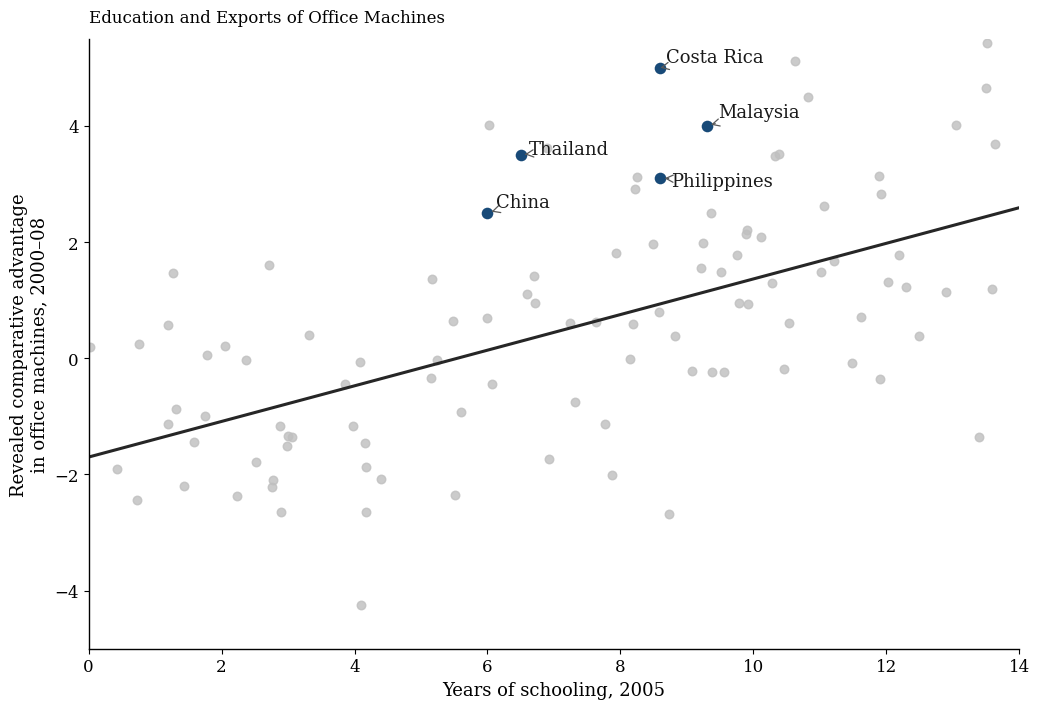

In [2]:
# -*- coding: utf-8 -*-
# Recria o gráfico "Education and Exports of Office Machines"
# sem seaborn (apenas matplotlib) e com alto nível de parametrização.

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Funções utilitárias
# ------------------------------------------------------------
def make_fake_data(n=100, seed=7, x_range=(0, 14), beta=0.27, intercept=-1.7, sigma=1.6):
    """
    Gera dados simulados para o exemplo.
    x ~ Uniform(x_range), y = intercept + beta*x + erro, erro ~ N(0, sigma^2).
    Retorna vetores (x, y).
    """
    rng = np.random.default_rng(seed)
    x = rng.uniform(x_range[0], x_range[1], n)
    y = intercept + beta * x + rng.normal(0, sigma, size=n)
    return x, y

def fit_line(x, y, deg=1):
    """
    Ajusta uma regressão polinomial (padrão: reta) e retorna função preditiva.
    Para deg=1: y_hat = a*x + b (a = coef[0], b = coef[1]).
    """
    coef = np.polyfit(x, y, deg)
    poly = np.poly1d(coef)
    return poly, coef

# ------------------------------------------------------------
# 2) Função principal de plotagem
# ------------------------------------------------------------
def plot_edu_exports(
    # ------------------ Dados ------------------
    x, y,
    # Destaques: lista de dicionários {"label": str, "x": float, "y": float}
    highlights=None,

    # ------------------ Estética global ------------------
    figsize=(10, 7),
    title="Education and Exports of Office Machines",
    title_loc="left",          # "left" ou "center"
    title_pad=12,              # distância vertical do título
    font_family="serif",
    font_serif=("DejaVu Serif", "Times New Roman", "Times"),

    # ------------------ Eixos ------------------
    x_label="Years of schooling, 2005",
    y_label="Revealed comparative advantage\nin office machines, 2000–08",
    xlim=(0, 14),
    ylim=(-5, 5.5),
    tick_labelsize=12,
    axis_labelsize=13,
    spine_linewidth=1.0,
    remove_top_right_spines=True,

    # ------------------ Pontos de fundo ------------------
    bg_marker="o",
    bg_size=36,
    bg_alpha=0.8,
    bg_color="0.7",            # cinza claro

    # ------------------ Reta de regressão ------------------
    show_reg_line=True,
    reg_color="0.1",           # quase preto
    reg_linewidth=2.0,

    # ------------------ Destaques ------------------
    hl_marker="o",
    hl_size=60,
    hl_color="#184a78",        # azul escuro; altere se quiser escala de cinza
    hl_edgecolor=None,         # "white", "0.2", etc. (None = sem contorno)
    hl_edgewidth=0.0,

    # Texto e setas dos destaques
    annotate=True,
    text_size=13,
    text_color="0.1",
    # offsets (dx, dy) em pontos tipográficos (não em coordenadas de dados)
    # sobrescreva por label via dict: {"China": (10, 5), "Malaysia": (10, 10), ...}
    default_text_offset=(6, 6),
    per_label_offsets=None,
    arrow=True,
    arrow_color="0.35",
    arrow_linewidth=0.9,
    arrow_style="-|>",         # "-|>" pontiagudo; "->" simples
    arrow_shrinkA=0, arrow_shrinkB=3,  # padroniza encostar melhor no marcador

    # ------------------ Exportação ------------------
    save_path=None,            # ex.: "figure.png" para salvar
    dpi=300,
):
    """
    Desenha o scatter + regressão + anotações no estilo do paper.
    Todos os parâmetros acima podem ser alterados conforme sua necessidade.
    """

    # ---- Tipografia e estilo base (sem tocar rcParams globais do usuário)
    plt.rcParams.update({
        "font.family": font_family,
        "font.serif": list(font_serif),
    })

    fig, ax = plt.subplots(figsize=figsize)

    # ---- Dispersão (pontos de fundo)
    ax.scatter(x, y, s=bg_size, c=bg_color, alpha=bg_alpha, marker=bg_marker, zorder=1)

    # ---- Reta de regressão (OLS simples por padrão)
    if show_reg_line:
        poly, coef = fit_line(x, y, deg=1)
        xx = np.linspace(xlim[0], xlim[1], 200)
        ax.plot(xx, poly(xx), color=reg_color, linewidth=reg_linewidth, zorder=2)

    # ---- Destaques (pontos + rótulos + setas)
    if highlights:
        for h in highlights:
            hx, hy, label = h["x"], h["y"], h["label"]

            # ponto destacado
            ax.scatter(
                [hx], [hy],
                s=hl_size,
                c=hl_color,
                edgecolors=hl_edgecolor if hl_edgecolor else hl_color,
                linewidths=hl_edgewidth,
                marker=hl_marker,
                zorder=3
            )

            if annotate:
                # deslocamento por-label (se houver), senão o default
                dx, dy = default_text_offset
                if per_label_offsets and label in per_label_offsets:
                    dx, dy = per_label_offsets[label]

                # texto
                ax.annotate(
                    label,
                    xy=(hx, hy), xycoords="data",
                    xytext=(dx, dy), textcoords="offset points",
                    fontsize=text_size, color=text_color,
                    ha="left", va="center",
                    arrowprops=dict(
                        arrowstyle=arrow_style,
                        color=arrow_color,
                        lw=arrow_linewidth,
                        shrinkA=arrow_shrinkA, shrinkB=arrow_shrinkB,
                    ) if arrow else None,
                    zorder=4
                )

    # ---- Eixos, limites e rótulos
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)

    ax.set_xlabel(x_label, fontsize=axis_labelsize)
    ax.set_ylabel(y_label, fontsize=axis_labelsize)

    ax.tick_params(axis="both", labelsize=tick_labelsize)

    # Remove apenas topo e direita (estilo paper)
    if remove_top_right_spines:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
    # Ajusta espessura das spines visíveis
    ax.spines["left"].set_linewidth(spine_linewidth)
    ax.spines["bottom"].set_linewidth(spine_linewidth)

    # ---- Título
    ax.set_title(title, loc=title_loc, pad=title_pad)

    # ---- Layout final
    fig.tight_layout()

    # ---- Exporta se solicitado
    if save_path:
        fig.savefig(save_path, dpi=dpi, bbox_inches="tight")
    return fig, ax


# ------------------------------------------------------------
# 3) Exemplo de uso (com dados simulados e destaques aproximados)
#    -> substitua por seus dados reais quando tiver
# ------------------------------------------------------------
if __name__ == "__main__":
    # 100 pontos de fundo
    x, y = make_fake_data(n=100, seed=3)

    # Países destacados (coordenadas aproximadas ao gráfico do paper)
    highlights = [
        {"label": "China",       "x": 6.0, "y": 2.5},
        {"label": "Thailand",    "x": 6.5, "y": 3.5},
        {"label": "Costa Rica",  "x": 8.6, "y": 5.0},
        {"label": "Malaysia",    "x": 9.3, "y": 4.0},
        {"label": "Philippines", "x": 8.6, "y": 3.1},
    ]

    # Offsets individuais (em pontos) para posicionar os rótulos
    offsets = {
        "China": (6, 8),
        "Thailand": (6, 4),
        "Costa Rica": (4, 8),
        "Malaysia": (8, 10),
        "Philippines": (8, -2),
    }

    # Chamada principal
    fig, ax = plot_edu_exports(
        x, y,
        highlights=highlights,
        # estética (ajuste à vontade)
        figsize=(10.5, 7.2),
        title="Education and Exports of Office Machines",
        title_loc="left",
        x_label="Years of schooling, 2005",
        y_label="Revealed comparative advantage\nin office machines, 2000–08",
        xlim=(0, 14),
        ylim=(-5, 5.5),
        # pontilhado
        bg_size=38, bg_color="0.75",
        # reta
        show_reg_line=True, reg_linewidth=2.2, reg_color="0.15",
        # destaques
        hl_size=70, hl_color="#184a78",
        annotate=True, per_label_offsets=offsets,
        arrow=True, arrow_style="->", arrow_color="0.35",
        # exporte se quiser
        # save_path="edu_exports.png"
    )

# Salvar/mostrar
    fig.savefig("dispersao.png", dpi=300, bbox_inches="tight")
    plt.show()


In [3]:
### ajustes do gráfico shap para ficar formatado no grid
from PIL import Image

# Caminho da imagem original (que será substituída)
image_path = "dispersao.png"

# Tamanho desejado: 5 x 5 polegadas a 300 dpi = 1500 x 1500 pixels
new_size = (1500, 1500)

# Abre a imagem original
img = Image.open(image_path)

# Redimensiona com método de alta qualidade (compatível com Pillow >= 10)
try:
    img = img.resize(new_size, Image.Resampling.LANCZOS)
except AttributeError:
    # Compatível com Pillow < 10
    img = img.resize(new_size, Image.LANCZOS)

# Salva sobrescrevendo a original
img.save(image_path)